In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import math as math
import sympy as sp
import numpy as np
from scipy.optimize import fsolve
from sympy.utilities.lambdify import lambdify
sp.init_printing()

In [ ]:
def psi0 (x, n, a = 2):
    return np.sqrt(2 / a) * np.sin(n * np.pi / a * x)

In [ ]:
def suma(m, n):
    part = 1 / (n**2 - m**2)**2 * (n * np.sin(np.pi * m / 2) * np.cos(np.pi * n / 2) + m * np.sin(np.pi * n / 2) * np.cos(np.pi * m / 2))
    return part

In [ ]:
def Psi(N, j, x, a = 1):
    psi = 0
    for i in range (0, N):
        if i != j:
            psi += suma(i, j) * np.sin(j * np.pi * x)
    return psi 

In [ ]:
 def C(a, V1):
        return 2 * 1 * a * a * V1 / np.pi**3 / (1)**2 

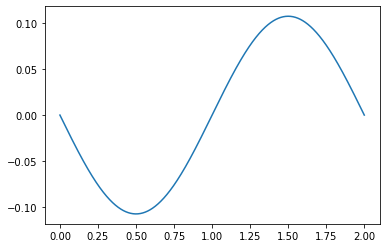

In [ ]:
xs = np.linspace(0, 2, 1000)
plt.plot(xs, C(2, 2) * Psi(100, 1, xs))

In [ ]:
def PSI (x, n, lam, N):
    return psi0(x, n) + lam * Psi(N, n, x)

In [ ]:
def k1(E, V1, m = 1, h = 1):
    return np.sqrt(2 * m * (E - V1)) / h

def k2(E, V2, m = 1, h = 1):
    return np.sqrt(2 * m * (E - V2)) / h

In [ ]:
def Psi1(A, k1, E, V1, x, a, b):
    return A * np.sin(k1 * x)

def Psi2(A, k1, k2, E, V2, x, a, b):
    return A * np.sin(k1 * a) / np.sin(k2 * (b - a)) * np.sin(k2 * (b - x))

In [ ]:
def A (a, b, k1, k2):
    return 1 / np.sqrt(a / 2 * (1 - np.sin(2 * k1 * a) / 2 / k1 / a + (np.sin(k1 * a))**2 * (2 * k2 * (b - a) - np.sin(2 * k2 * (b - a))) / 2 / k2 / a / (np.sin(k2 * (b - a)))**2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


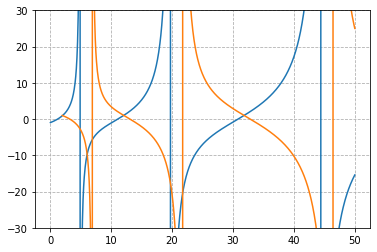

In [ ]:
a = 1
b = 2
V1 = 2
V2 = 0
Es = np.linspace(0, 50, 1000)
plt.plot(Es, -k2(Es, V2) / np.tan(k2(Es, V2) * (b - a)))
plt.plot(Es, k1(Es, V1) / np.tan(k1(Es, V1) * a))
plt.ylim(-30, 30)
plt.grid(ls = '--')

In [ ]:
E0 = fsolve(lambda E: k2(E, V2) * np.tan(k1(E, V1) * a) + k1(E, V1) * np.tan(k2(E, V2) * (b - a)), 3)[0]
E0

In [ ]:
E1 = fsolve(lambda E: k2(E, V2) * np.tan(k1(E, V1) * a) + k1(E, V1) * np.tan(k2(E, V2) * (b - a)), 7)[0]
E1

In [ ]:
E2 = fsolve(lambda E: k2(E, V2) * np.tan(k1(E, V1) * a) + k1(E, V1) * np.tan(k2(E, V2) * (b - a)), 13)[0]
E2

In [ ]:
E3 = fsolve(lambda E: k2(E, V2) * np.tan(k1(E, V1) * a) + k1(E, V1) * np.tan(k2(E, V2) * (b - a)), 21)[0]
E3

In [ ]:
E4 = fsolve(lambda E: k2(E, V2) * np.tan(k1(E, V1) * a) + k1(E, V1) * np.tan(k2(E, V2) * (b - a)), 32)[0]
E4

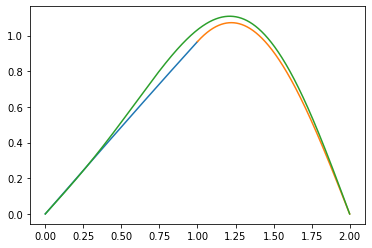

In [ ]:
E = E0
xs1 = np.linspace(0, 1, 1000)
xs2 = np.linspace(1, 2, 1000)
plt.plot(xs1, Psi1(A(1, 2, k1(E, V1), k2(E, V2)), k1(E, V1), E, V1, xs1, 1, 2))
plt.plot(xs2, Psi2(A(1, 2, k1(E, V1), k2(E, V2)), k1(E, V1), k2(E, V2), E, V2, xs2, 1, 2))

xs = np.linspace(0, 2, 1000)
plt.plot(xs, C(a, V1) * 8 * PSI(xs, 1, 1, 1000))


In [ ]:
def E(n, h = 1, m = 1, a = 2):
    return n**2 * h**2 * np.pi**2 / 2 / m / a**2

2.2337005501361697
5.934802200544679
12.103304951225528
20.739208802178716
31.842513753404244


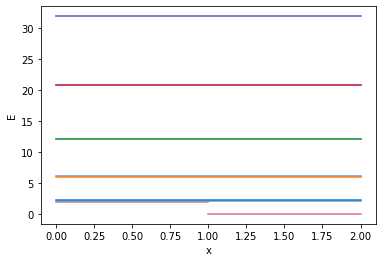

In [ ]:
xs = np.linspace(0, 2, 1000)
x1 = np.linspace(0, 1, 500)
x2 = np.linspace(1, 2, 500)
ys = np.linspace(E0, E0, 1000)
ys1 = np.linspace(E1, E1, 1000)
ys2 = np.linspace(E2, E2, 1000)
ys3 = np.linspace(E3, E3, 1000)
ys4 = np.linspace(E4, E4, 1000)
y1 = np.linspace(V1, V1, 500)
y2 = np.linspace(V2, V2, 500)
plt.plot(x1, y1, color='palevioletred')
plt.plot(x2, y2, color='palevioletred')
plt.plot(xs, ys, color='cornflowerblue')
plt.plot(xs, ys1, color='cornflowerblue')
plt.plot(xs, ys2, color='cornflowerblue')
plt.plot(xs, ys3, color='cornflowerblue')
plt.plot(xs, ys4, color='cornflowerblue')
plt.xlabel('x')
plt.ylabel('E')

for ii in range (1, 6):
    En = (E(ii) + V1/2)
    print (En)
    en = np.linspace(En, En, 1000)
    plt.plot(xs, en)

2.2337005501361697
5.934802200544679
12.103304951225528
20.739208802178716
31.842513753404244


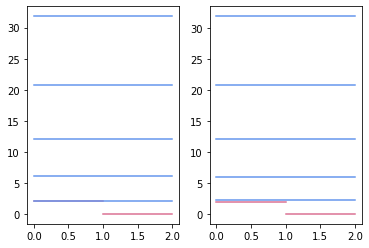

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x1, y1, color='palevioletred')
ax1.plot(x2, y2, color='palevioletred')
ax1.plot(xs, ys, color='cornflowerblue')
ax1.plot(xs, ys1, color='cornflowerblue')
ax1.plot(xs, ys2, color='cornflowerblue')
ax1.plot(xs, ys3, color='cornflowerblue')
ax1.plot(xs, ys4, color='cornflowerblue')

ax2.plot(x1, y1, color='palevioletred')
ax2.plot(x2, y2, color='palevioletred')

for ii in range (1, 6):
    En = (E(ii) + V1/2)
    print (En)
    en = np.linspace(En, En, 1000)
    ax2.plot(xs, en, color='cornflowerblue')